# CW 1, Exercise 2

In this question we can review some publically available data.

The data we use is H3K27Ac ChIP-seq from the Encode consortium, Experiment ENCSR863VHE and sample 1 (ENCBS844FSC) out of two replicates.

The data is part of the Encode project and so more information can be found at the Encode portal.

I have already identified a set of genomic locations enriched for H3K27Ac signal using the HOMER software and you will find this in the directory HOMER_peaks.

**HOMER_peaks/H3K27Ac_Limb_1.txt**

## Question 1:
Read in H3K27Ac_Limb_1.txt file and report the number of genomic locations listed in file.

In [1]:
library(rtracklayer)
getwd()

Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Loading requi

[1] "/data/BioInf2018CourseWork"

In [2]:
homerPeaks <- read.table(file = "HOMER_peaks/H3K27Ac_Limb_1.txt", 
                         col.names = c("PeakID" , "chr", "start", "end", "strand", 
                                    "Normalized Tag Count", "region size", "findPeaks Score", "Total Tags",
                                    "Control Tags", "Fold Change vs Control", "p-value vs Control", "Clonal Fold Change"))
nrow(homerPeaks)

[1] 20447

## Question 2:
Make a histogram of the log10 of regions sizes as shown below using base graphics.

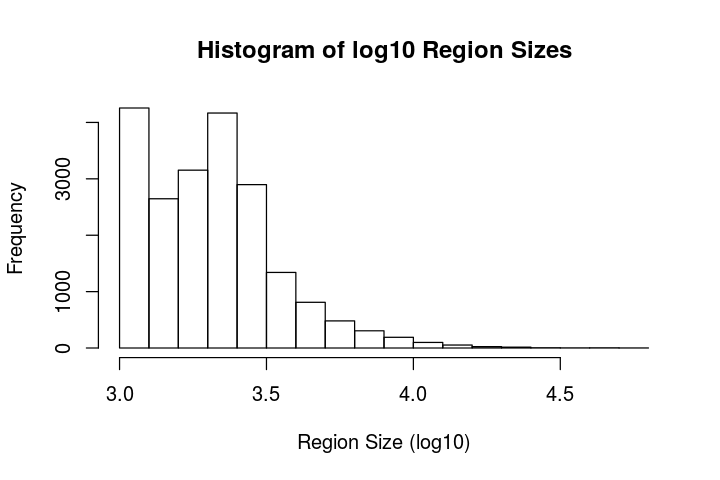

In [3]:
options(repr.plot.width=6, repr.plot.height=4)
hist(log10(homerPeaks$region.size), xlab = "Region Size (log10)", main = "Histogram of log10 Region Sizes", )

## Question 3:
Make a density plot of the log10 of regions sizes as shown below using ggplot graphics.

In [4]:
library(ggplot2)

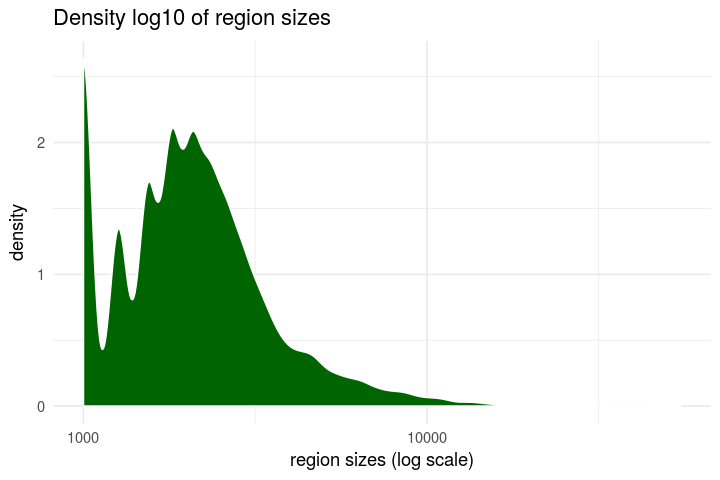

In [5]:
q3plot <- ggplot(homerPeaks, aes(x=region.size)) +
            geom_density(color= "white", fill="darkgreen") +
            scale_x_log10() + xlab("region sizes (log scale)") +
            ggtitle("Density log10 of region sizes") +
            theme_minimal()
q3plot

## Question 4:
Make a density plot for each chromosome of the log10 of regions sizes as shown below using ggplot graphics.

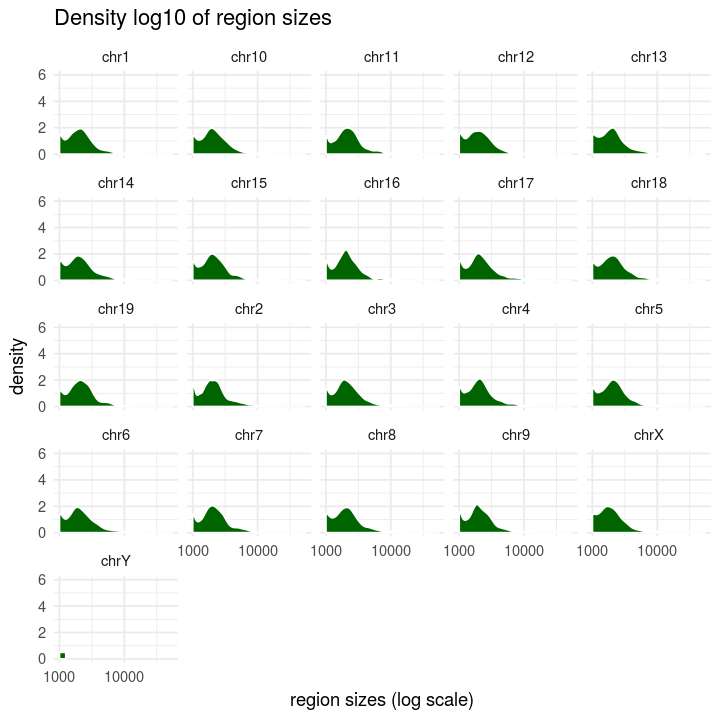

In [6]:
options(repr.plot.width=6, repr.plot.height=6)
q4plot <- ggplot(homerPeaks, aes(x=region.size)) +
            geom_density(color= "white", fill="darkgreen") +
            scale_x_log10() + xlab("region sizes (log scale)") +
            ggtitle("Density log10 of region sizes") +
            theme_minimal() +
            facet_wrap(~ chr) +
            ylim(0,6)
q4plot

*Note that chrY differs from the target plot - this appears to be due to differences in the source data*

```bash
user@system:/data/BioInf2018CourseWork/HOMER_peaks$ grep chrY H3K27Ac_Limb_1.txt
chrY-5  chrY    1244772 1246025 +       18.1    1253.000        60.000000       63.0    5.9     10.71   4.65e-42        0.92
chrY-21 chrY    809141  810141  +       11.8    1000.000        38.000000       41.0    4.7     8.71    1.15e-24        0.98
user@system:/data/BioInf2018CourseWork/HOMER_peaks$
```

## Question 5:
 Make a boxplot plot of the log10 of findPeaks.Score for each chromosome as shown below using ggplot graphics.
 
 *note - the given target image appears to be of region.size, not findPeaks.Score... - I've accordingly graphed both instead*

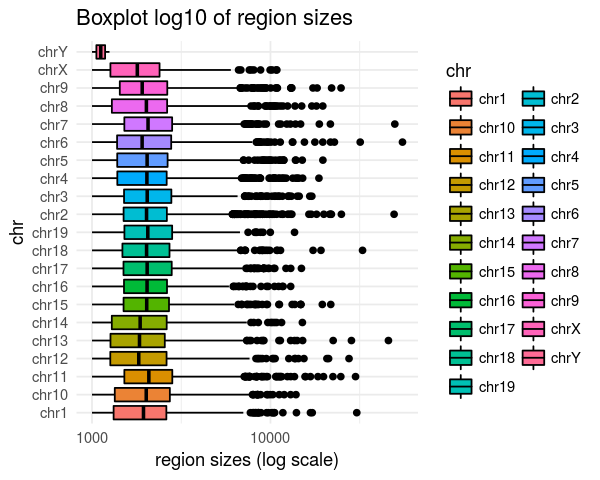

In [7]:
options(repr.plot.width=5, repr.plot.height=4)
q5plota <- ggplot(homerPeaks, aes(chr, region.size, fill = chr)) +
            geom_boxplot(color = "black") + 
            scale_y_log10() + 
            ylab("region sizes (log scale)") +
            theme_minimal() +
            ggtitle("Boxplot log10 of region sizes") +
            coord_flip()
q5plota

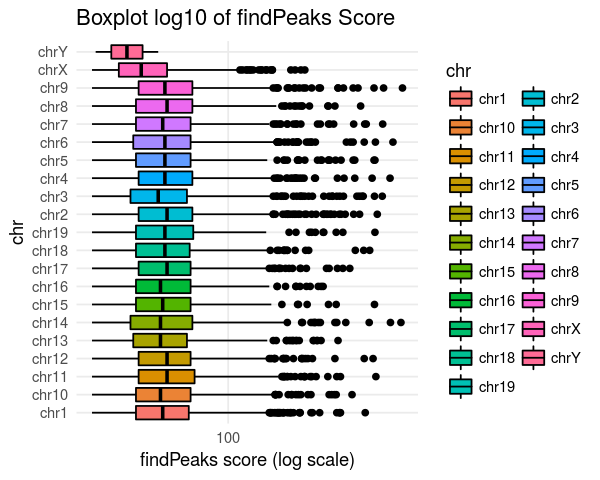

In [8]:
options(repr.plot.width=5, repr.plot.height=4)
q5plotb <- ggplot(homerPeaks, aes(chr, findPeaks.Score, fill = chr)) +
            geom_boxplot(color = "black") + 
            scale_y_log10() + 
            ylab("findPeaks score (log scale)") +
            theme_minimal() +
            ggtitle("Boxplot log10 of findPeaks Score") +
            coord_flip()
q5plotb

## Question 6:
Export the Homer genomic regions as a BED3 file.

In [9]:
write.table(homerPeaks[c("chr", "start", "end")], file = "HOMER_peaks/H3K27Ac_Limb_1.bed3", sep = "\t",
            eol = "\n", col.names = FALSE, row.names = FALSE,  quote= FALSE)

## Question 7
Load the generated BED3 file into IGV and compare to the peaks in bed/narrowPeak and signal p-value in bigWig format found at the Encode portal. Capture a image and include in results.

![image](E2_Q7.png)